Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:
 [[1 0]
 [0 2]]


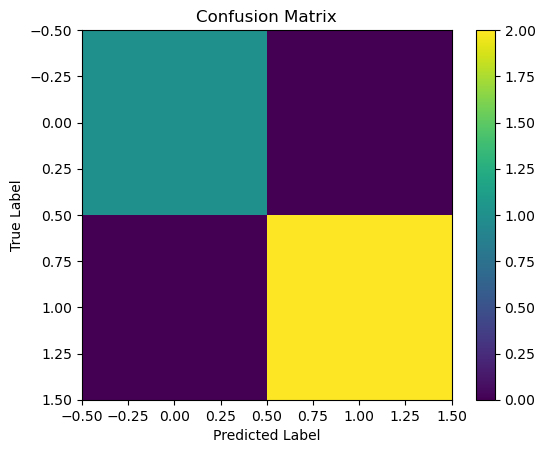

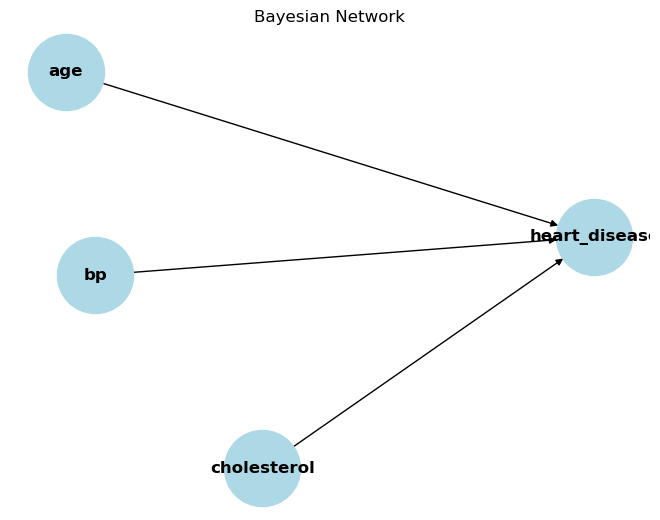

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = {
    "age": [29, 45, 34, 60, 50, 41, 52, 39, 48, 59],
    "cholesterol": [200, 240, 210, 280, 260, 230, 300, 220, 250, 270],
    "bp": [120, 140, 130, 150, 140, 135, 160, 125, 145, 155],
    "heart_disease": [0, 1, 0, 1, 1, 0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

X = df[["age", "cholesterol", "bp"]]
y = df["heart_disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

G = nx.DiGraph()
G.add_edges_from([
    ("age", "heart_disease"),
    ("cholesterol", "heart_disease"),
    ("bp", "heart_disease")
])

nx.draw(
    G,
    with_labels=True,
    node_size=3000,
    node_color="lightblue",
    font_weight="bold"
)

plt.title("Bayesian Network")
plt.show()